<a href="https://colab.research.google.com/github/cmaloney111/Tail-Model-Training/blob/main/treinando_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explorar e testar treinar nossos próprios modelos de rede neural.
Referências

Grupos:
Gisele e Cameron

1º: Escolher um dataset

2º: Analisar os datasets (EDA - Analise Exploratoria dos Dados)

3º: Definir as camadas do modelo

4º: Treinar o modelo

5º: Testar acurácia


1º: Escolher um dataset

In [ ]:
from google.colab import drive
import json
import pandas as pd


# Step 1: Import the Kaggle API library
!pip install kaggle

# # Step 2: Upload Kaggle API key
from google.colab import files
files.upload()

# Step 3: Set Kaggle API credentials
import os

# Ensure the Kaggle API key is in the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the Kaggle dataset (replace with your dataset name)
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

# Step 5: Unzip the dataset (replace with the appropriate zip file and directory)
import zipfile

with zipfile.ZipFile('/content/news-headlines-dataset-for-sarcasm-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

pathv1 = "/content/dataset/Sarcasm_Headlines_Dataset.json"
pathv2 = "/content/dataset/Sarcasm_Headlines_Dataset_v2.json"
# Isso solicitará a autorização e fornecerá um link para obter o código de autorização
# drive.mount('/content/drive')

# path = '/content/drive/MyDrive/ufpb/5_PERIODO/TAIL/tarefa_treinar_modelo/sarcasm_database.json'
# with open(path, 'r') as arquivo_json:
#     dados_json = json.load(arquivo_json)

dados_json_test = []

with open(pathv1, 'r') as file:
    for line in file:
        obj = json.loads(line)
        dados_json_test.append(obj)


dados_json_train = []

with open(pathv2, 'r') as file:
    for line in file:
        obj = json.loads(line)
        dados_json_train.append(obj)

"""
novo_conteudo_json = ''
dentro_do_objeto = False

# Dividir o conteúdo do JSON em objetos individuais
objetos_json = dados_json.split('}')

# Remover a última entrada vazia
objetos_json = objetos_json[:-1]

# Adicionar vírgula após cada objeto JSON
novo_conteudo_json = '},'.join(objetos_json) + '}'
"""
"""
for caractere in dados_json:
    if caractere == '{':
        dentro_do_objeto = True
    elif caractere == '}':
        dentro_do_objeto = False
        novo_conteudo_json += ','
    novo_conteudo_json += caractere

# Remover a vírgula extra no final, se houver
#novo_conteudo_json = novo_conteudo_json.rstrip(',')

caminho_novo_arquivo = '/content/drive/MyDrive/ufpb/5_PERIODO/TAIL/tarefa_treinar_modelo/seu_novo_arquivo.json'

with open(caminho_novo_arquivo, 'w') as novo_arquivo_json:
    novo_arquivo_json.write(novo_conteudo_json)

"""
df_train = pd.DataFrame(dados_json_train)
df_test = pd.DataFrame(dados_json_test)

Saving kaggle.json to kaggle.json
 61% 2.00M/3.30M [00:00<00:00, 2.75MB/s]
100% 3.30M/3.30M [00:00<00:00, 3.60MB/s]


2º: Analisar os datasets (EDA - Analise Exploratoria dos Dados)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  \
0  https://www.theonion.com/thirtysomething-scien...   
1  https://www.huffingtonpost.com/entry/donna-edw...   
2  https://www.huffingtonpost.com/entry/eat-your-...   
3  https://local.theonion.com/inclement-weather-p...   
4  https://www.theonion.com/mother-comes-pretty-c...   

                              preprocessed_headlines  
0  thirtysomething scientists unveil doomsday clo...  
1  dem rep. totally nails why congress is falling...  
2  eat your veggies: 9 deliciously different recipes  
3  inclement weather p

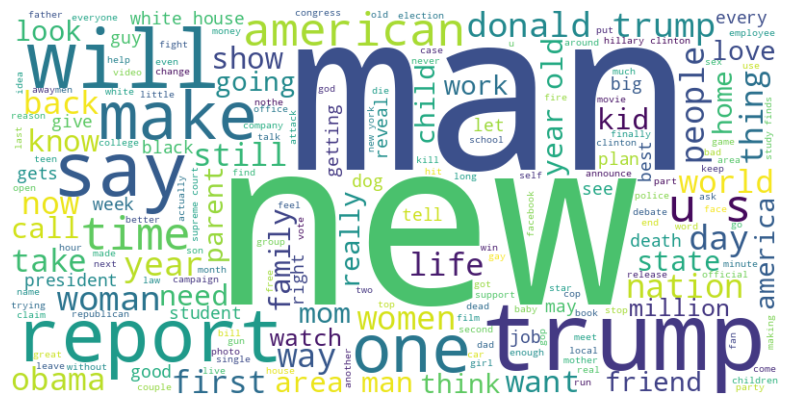

0    14985
1    13634
Name: is_sarcastic, dtype: int64


In [ ]:
# Vamos primeiro limpar nossos dados:

import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, auc, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Primeiro a gente tem que baixar uns recursos de nltk para pre-processar os dados
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Isso vai ser a funcao de pre-processamento dos dados
def preprocess_text2(text):
    text = text.lower()

    # Essa eh uma funcao que eu peguei da internet pq nao sei nada de regex que basicamente so vai deixar caracteres no texto
    # (ou seja, sem numeros nem puntuacao)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Eliminar stop words (nao sei traduzir essa wea)
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Lemmatizacao (ou seja fazer com que palavras parecidas estejam da mesma forma)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Colocar as palavras juntas depois de tokenizar elas
    processed_text = ' '.join(words)

    return processed_text

def preprocess_text(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase.lower()

# Preprocessar cada headline
print(df_train.head())
df_train['preprocessed_headlines'] = df_train['headline'].apply(preprocess_text)
df_test['preprocessed_headlines'] = df_test['headline'].apply(preprocess_text)

# Negocio para fazer um wordcloud que peguei da internet
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_train['preprocessed_headlines']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(df_train['is_sarcastic'].value_counts())
# Tokenizacao e padding (pq a rede precisa de inputs do mesmo tamanho)
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # oov = out of vocabulary, palavras que nao estao nos 5000)
tokenizer.fit_on_texts(df_train['preprocessed_headlines']) # colocar o tokenizer nesse dataset em especifico
sequences = tokenizer.texts_to_sequences(df_train['preprocessed_headlines']) # convertir cada texto numa secuencia de inteiros (segundo o valor da tokenizacao)
padded_train = pad_sequences(sequences, maxlen=25, padding='post', truncating='post') # adicionar ou eliminar elementos so no final, com uma secuencia maxima de 30

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # oov = out of vocabulary, palavras que nao estao nos 5000)
tokenizer.fit_on_texts(df_test['preprocessed_headlines']) # colocar o tokenizer nesse dataset em especifico
sequences = tokenizer.texts_to_sequences(df_test['preprocessed_headlines']) # convertir cada texto numa secuencia de inteiros (segundo o valor da tokenizacao)
padded_test = pad_sequences(sequences, maxlen=25, padding='post', truncating='post') # adicionar ou eliminar elementos so no final, com uma secuencia maxima de 30


In [ ]:
def hp_v_a_plot(results, param):
    plt.plot(results[param], results['mean_train_score'], "bo-", label='Train accuracy')
    plt.plot(results[param], results['mean_test_score'], "ro-", label='CV accuracy')
    plt.xscale("log")
    plt.legend()
    plt.xlabel(param + ": hyperparameter")
    plt.ylabel("accuracy")
    plt.title("Hyper parameter Vs accuracy plot")
    plt.grid()
    plt.show()

# BOW

In [ ]:
vectorizer = CountVectorizer(min_df = 10, max_df = 5000, ngram_range = (1, 3))

vectorizer.fit(df_train['preprocessed_headlines'])
x_train = vectorizer.transform(df_train['preprocessed_headlines'])
x_test = vectorizer.transform(df_test['preprocessed_headlines'])

y_train = df_train['is_sarcastic']
y_test = df_test['is_sarcastic']

x_train.shape, x_test.shape

((28619, 6283), (26709, 6283))

# Regressao logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(n_jobs = -1)
params = {"C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}


gridsearch = GridSearchCV(model, params, scoring = "accuracy", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100]},
             return_train_score=True, scoring='accuracy')

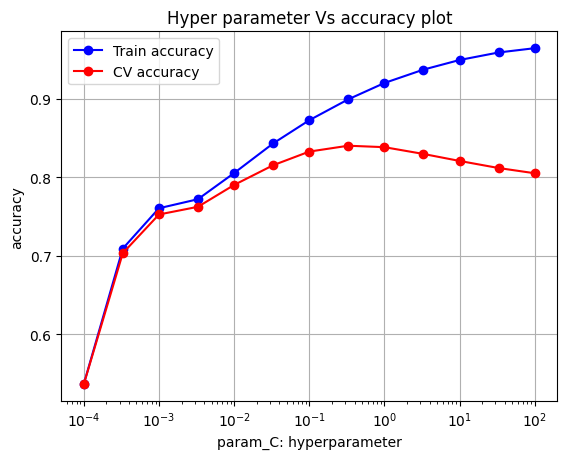

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_C'])
hp_v_a_plot(results, 'param_C')

Accuracy: 91.3287655846344


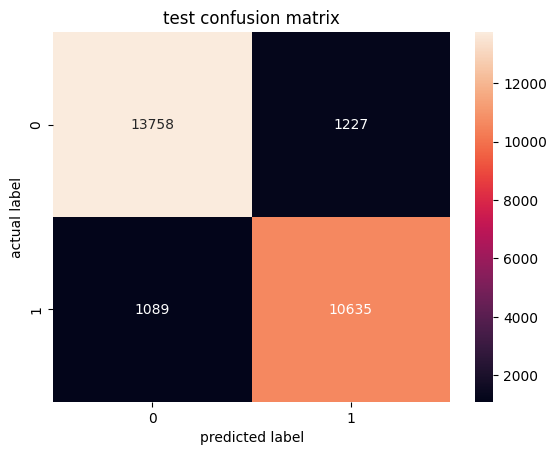

In [ ]:
model = LogisticRegression(C = 1, max_iter = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
bow_lr_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", bow_lr_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(class_prior = [.5, .5])
params = {"alpha" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}

gridsearch = GridSearchCV(model, params, cv = 5, scoring = "accuracy", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033,
                                   0.1, 0.33, 1, 3.3, 10, 33, 100]},
             return_train_score=True, scoring='accuracy')

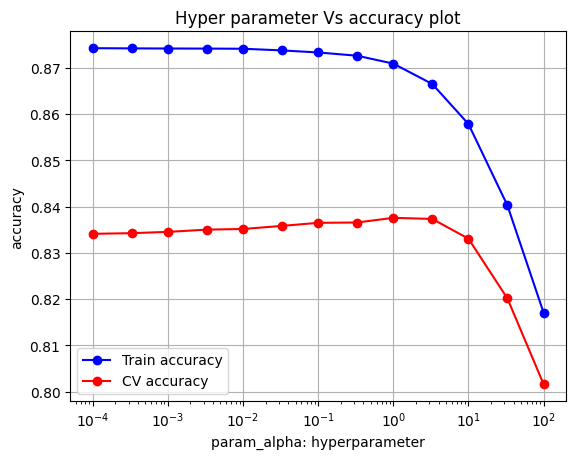

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_alpha'])
hp_v_a_plot(results, 'param_alpha')

Accuracy: 86.95570781384552


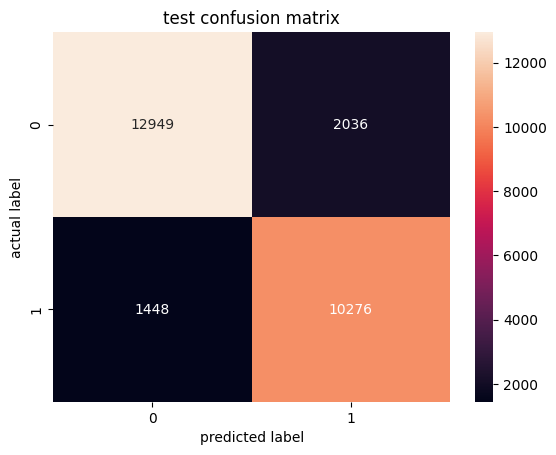

In [ ]:
model = MultinomialNB(alpha = 0.033)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
bow_nb_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", bow_nb_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
params = {"n_estimators" : [10, 50, 100, 150]}

gridsearch = GridSearchCV(model, params, scoring = "accuracy", return_train_score = True, n_jobs = -1)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 150]},
             return_train_score=True, scoring='accuracy')

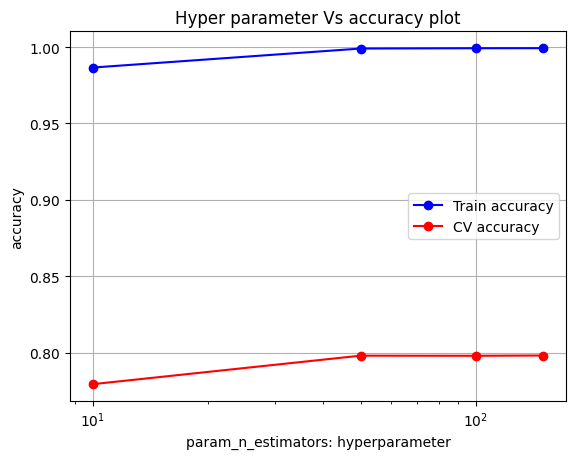

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_n_estimators'])
hp_v_a_plot(results, 'param_n_estimators')

Accuracy: 99.91014264854543


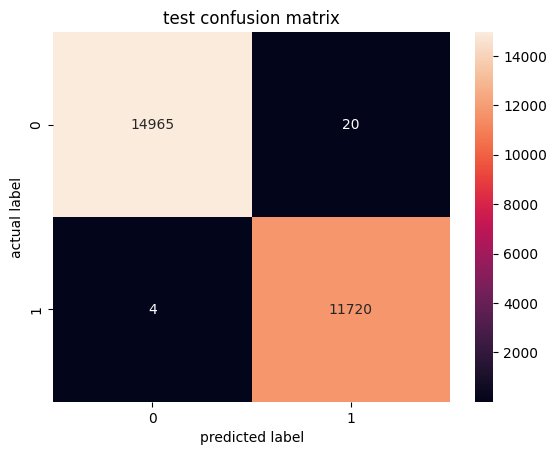

In [ ]:
model = RandomForestClassifier(n_estimators = 50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
bow_rf_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", bow_rf_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# GBDT

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(verbosity = 1, use_label_encoder = False)
params = {"n_estimators" : [10, 50, 100, 150],
          "max_depth" : [4, 8, 16, 32]}

gridsearch = GridSearchCV(model, params,
                          cv = 5, scoring = "accuracy",
                          return_train_score = True,
                          verbose = 1, n_jobs = -1)
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': [10, 50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=1)

<ipython-input-17-1772d7016093>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
<ipython-input-17-1772d7016093>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
<ipython-input-17-1772d7016093>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
<ipython-input-17-1772d7016093>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hmap_cv = results.pivot("param_max_depth", "param_n_estimators", "mean_test_score")
<ip

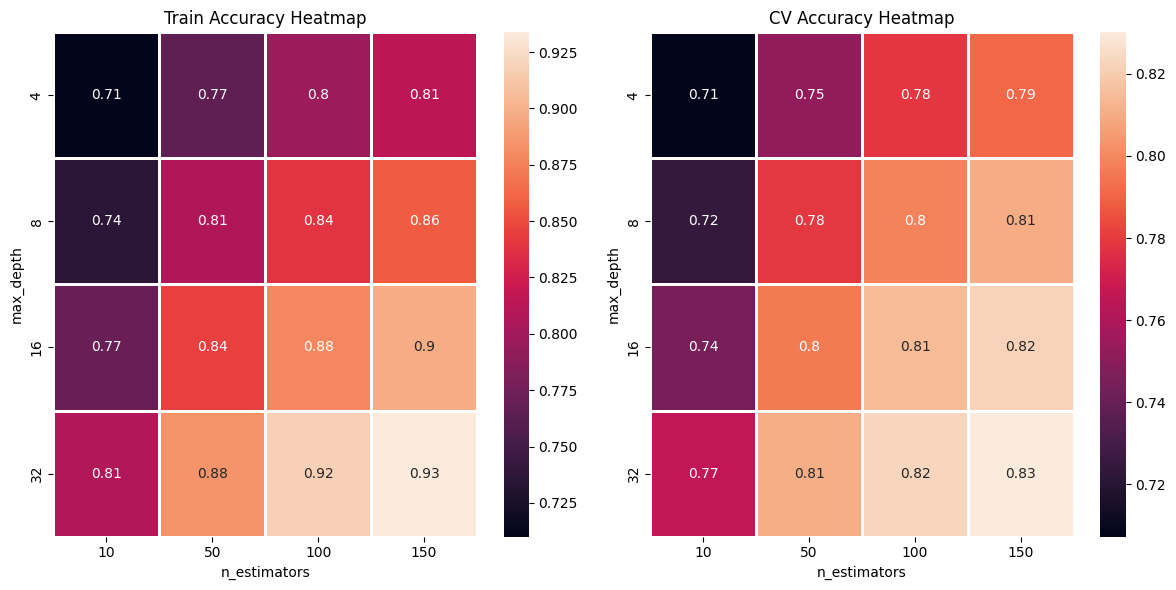

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

# First heatmap - Train Accuracy
hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
sns.heatmap(hmap_train, linewidth=1, annot=True, ax=axs[0])
axs[0].set_ylabel("max_depth")
axs[0].set_xlabel("n_estimators")
axs[0].set_title("Train Accuracy Heatmap")

# Second heatmap - CV Accuracy
hmap_cv = results.pivot("param_max_depth", "param_n_estimators", "mean_test_score")
sns.heatmap(hmap_cv, linewidth=1, annot=True, ax=axs[1])
axs[1].set_ylabel("max_depth")
axs[1].set_xlabel("n_estimators")
axs[1].set_title("CV Accuracy Heatmap")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Accuracy: 92.80766782732412


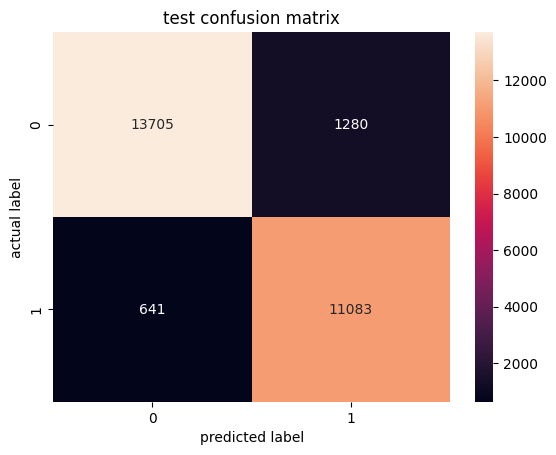

In [ ]:
model = xgb.XGBClassifier(n_estimators = 150, max_depth = 32, verbosity = 1, use_label_encoder = False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
bow_xgb_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", bow_xgb_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 10, max_df = 5000, ngram_range = (1, 3))

vectorizer.fit(df_train['preprocessed_headlines'])
x_train = vectorizer.transform(df_train['preprocessed_headlines'])
x_test = vectorizer.transform(df_test['preprocessed_headlines'])

y_train = df_train['is_sarcastic']
y_test = df_test['is_sarcastic']

x_train.shape, x_test.shape

((28619, 6283), (26709, 6283))

# Regressao logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(n_jobs = -1)
params = {"C" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}


gridsearch = GridSearchCV(model, params, scoring = "accuracy", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033, 0.1,
                               0.33, 1, 3.3, 10, 33, 100]},
             return_train_score=True, scoring='accuracy')

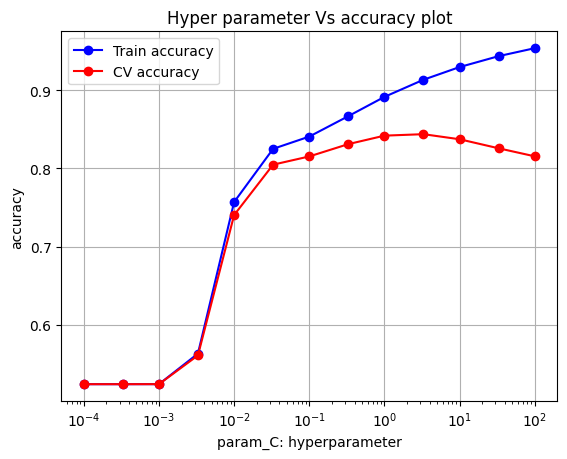

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_C'])
hp_v_a_plot(results, 'param_C')

Accuracy: 90.76715713804336


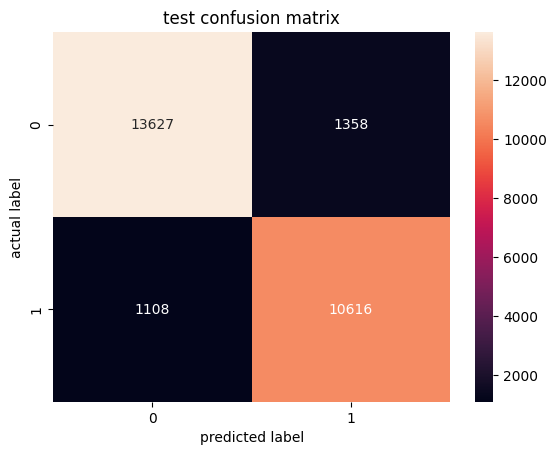

In [ ]:
model = LogisticRegression(C = 3.3, max_iter = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
tf_lr_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", tf_lr_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(class_prior = [.5, .5])
params = {"alpha" : [0.0001, .00033, .001, .0033, .01, .033, .1, .33, 1, 3.3, 10, 33, 100]}

gridsearch = GridSearchCV(model, params, cv = 5, scoring = "accuracy", return_train_score = True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.00033, 0.001, 0.0033, 0.01, 0.033,
                                   0.1, 0.33, 1, 3.3, 10, 33, 100]},
             return_train_score=True, scoring='accuracy')

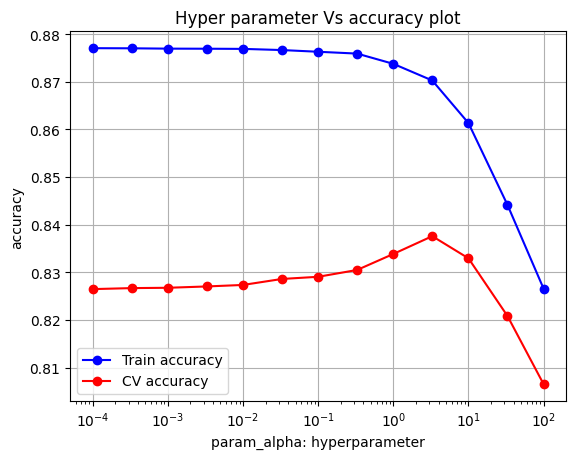

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_alpha'])
hp_v_a_plot(results, 'param_alpha')

Accuracy: 87.09798195364858


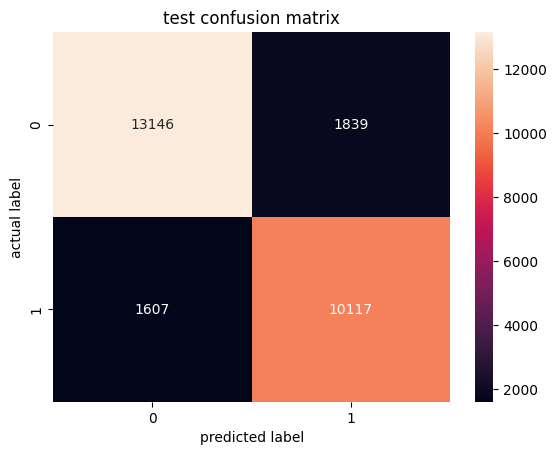

In [ ]:
model = MultinomialNB(alpha = 0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
tf_nb_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", tf_nb_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
params = {"n_estimators" : [10, 50, 100, 150]}

gridsearch = GridSearchCV(model, params, scoring = "accuracy", return_train_score = True, n_jobs = -1)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 150]},
             return_train_score=True, scoring='accuracy')

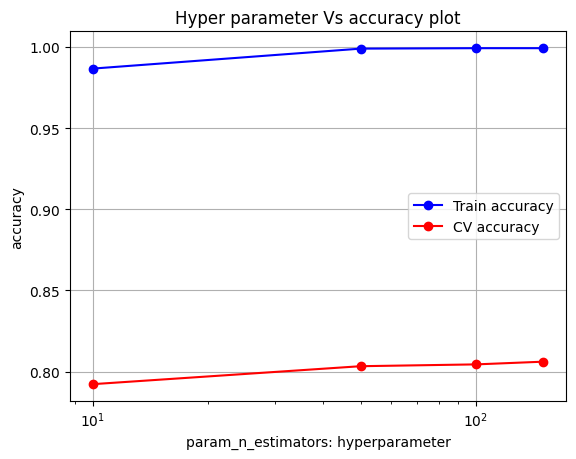

In [ ]:
results = pd.DataFrame.from_dict(gridsearch.cv_results_)
results = results.sort_values(['param_n_estimators'])
hp_v_a_plot(results, 'param_n_estimators')

Accuracy: 99.91763076116665


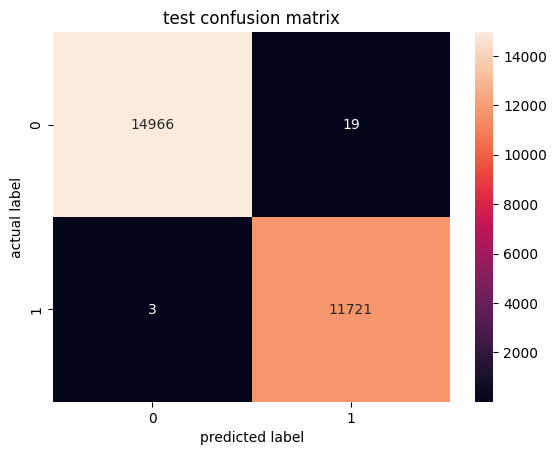

In [ ]:
model = RandomForestClassifier(n_estimators = 50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
tf_rf_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", tf_rf_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# GBDT

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(verbosity = 1, use_label_encoder = False)
params = {"n_estimators" : [10, 50, 100, 150],
          "max_depth" : [4, 8, 16, 32]}

gridsearch = GridSearchCV(model, params,
                          cv = 5, scoring = "accuracy",
                          return_train_score = True,
                          verbose = 1, n_jobs = -1)
gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': [10, 50, 100, 150]},
             return_train_score=True, scoring='accuracy', verbose=1)

<ipython-input-30-1772d7016093>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
<ipython-input-30-1772d7016093>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
<ipython-input-30-1772d7016093>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
<ipython-input-30-1772d7016093>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hmap_cv = results.pivot("param_max_depth", "param_n_estimators", "mean_test_score")
<ip

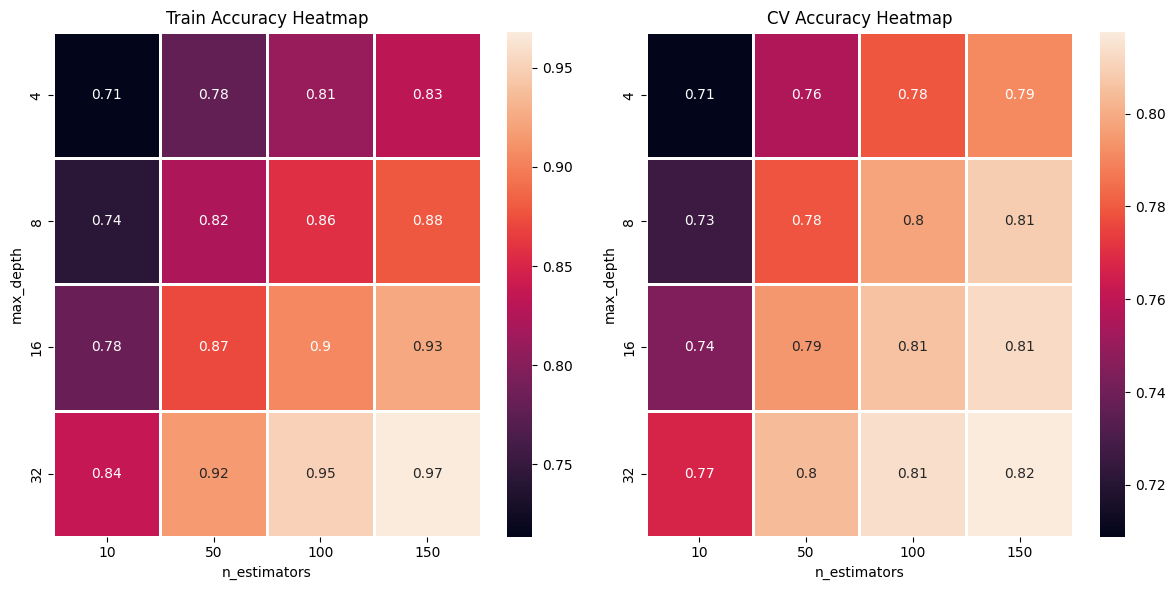

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
results = pd.DataFrame.from_dict(gridsearch.cv_results_)

# First heatmap - Train Accuracy
hmap_train = results.pivot("param_max_depth", "param_n_estimators", "mean_train_score")
sns.heatmap(hmap_train, linewidth=1, annot=True, ax=axs[0])
axs[0].set_ylabel("max_depth")
axs[0].set_xlabel("n_estimators")
axs[0].set_title("Train Accuracy Heatmap")

# Second heatmap - CV Accuracy
hmap_cv = results.pivot("param_max_depth", "param_n_estimators", "mean_test_score")
sns.heatmap(hmap_cv, linewidth=1, annot=True, ax=axs[1])
axs[1].set_ylabel("max_depth")
axs[1].set_xlabel("n_estimators")
axs[1].set_title("CV Accuracy Heatmap")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Accuracy: 96.2671758583249


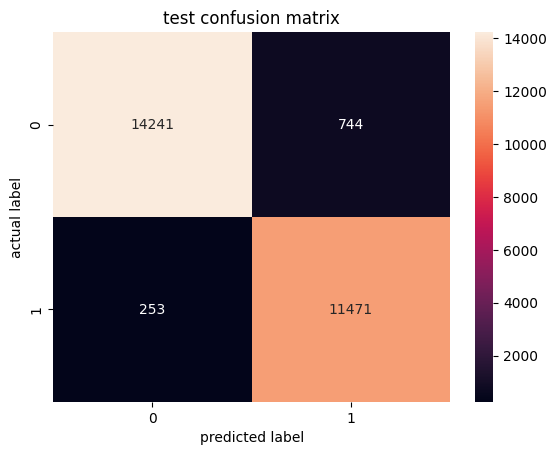

In [ ]:
model = xgb.XGBClassifier(n_estimators = 150, max_depth = 32, verbosity = 1, use_label_encoder = False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
tf_xgb_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", tf_xgb_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("test confusion matrix")
plt.show()

# GloVe


In [ ]:
drive.mount('/content/drive')
def load_glove_vectors(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    word_to_vec = {}
    for line in lines:
        parts = line.split()
        word = parts[0]
        vec = np.array(parts[1:], dtype='float32')
        word_to_vec[word] = vec

    return word_to_vec

glove_file_path = 'drive/MyDrive/glove.6B.300d.txt'
glove_model = load_glove_vectors(glove_file_path)


Mounted at /content/drive


In [ ]:
t = Tokenizer()
t.fit_on_texts(df_train["preprocessed_headlines"])

encoded_train = t.texts_to_sequences(df_train["preprocessed_headlines"])
encoded_test = t.texts_to_sequences(df_test["preprocessed_headlines"])

max_length = 25

padded_train = pad_sequences(encoded_train,
                             maxlen = max_length,
                             padding = "post",
                             truncating = "post")

padded_test = pad_sequences(encoded_test,
                            maxlen = max_length,
                            padding = "post",
                            truncating = "post")


In [ ]:
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Activation, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model
from tensorflow.keras import backend
import numpy as np

# Constuir o modelo sequential (mistura de procurar coisas na internet e tentativa e erro)

# modelo rapido (acuracia 95% com 13 epochs)

model = Sequential()
model.add(Embedding(input_dim=len(t.word_index) + 1, output_dim=16, input_length=25))
model.add(Flatten())
#model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

"""

model.add(Dropout(0.2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
"""
"""
# modelo lento (acuracia 95% com 50 epochs)
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=25))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
"""

# compilar o modelo com adam (ainda nao sei oq eh o learning rate ideal)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model.png', show_shapes=True)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 16)            473408    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 32)                12832     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 486273 (1.85 MB)
Trainable params: 486273 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(padded_train, y_train,
                    epochs = 8,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/8
716/716 [==============================] - 8s 10ms/step - loss: 0.4090 - accuracy: 0.8027 - val_loss: 0.2996 - val_accuracy: 0.8683
Epoch 2/8
716/716 [==============================] - 5s 6ms/step - loss: 0.1514 - accuracy: 0.9428 - val_loss: 0.3194 - val_accuracy: 0.8690
Epoch 3/8
716/716 [==============================] - 8s 11ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.4059 - val_accuracy: 0.8643
Epoch 4/8
716/716 [==============================] - 8s 12ms/step - loss: 0.0114 - accuracy: 0.9977 - val_loss: 0.4767 - val_accuracy: 0.8646
Epoch 5/8
716/716 [==============================] - 6s 8ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.5302 - val_accuracy: 0.8625
Epoch 6/8
716/716 [==============================] - 9s 13ms/step - loss: 7.8327e-04 - accuracy: 1.0000 - val_loss: 0.5665 - val_accuracy: 0.8632
Epoch 7/8
716/716 [==============================] - 5s 6ms/step - loss: 3.6869e-04 - accuracy: 1.0000 - val_loss: 0.6002 - val_accuracy: 0.8637
E

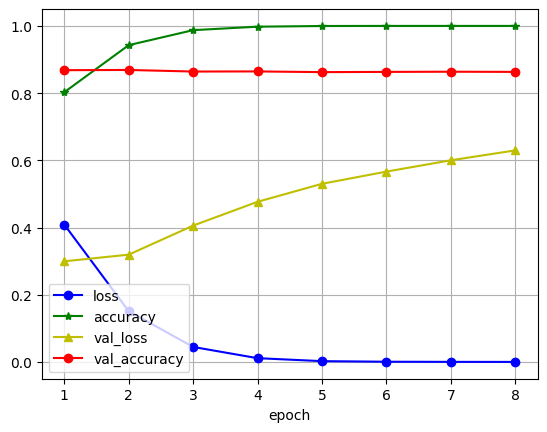

In [ ]:
plt.figure()
L = len(history.history["loss"]) + 1
plt.plot(range(1, L), history.history["loss"], "bo-", label = "loss")
plt.plot(range(1, L), history.history["accuracy"], "g*-", label = "accuracy")
plt.plot(range(1, L), history.history["val_loss"], "y^-", label = "val_loss")
plt.plot(range(1, L), history.history["val_accuracy"], "ro-", label = "val_accuracy")
plt.legend()
plt.xlabel("epoch")
plt.grid()
plt.show()

835/835 [==============================] - 1s 1ms/step
Accuracy: 97.28181511849938


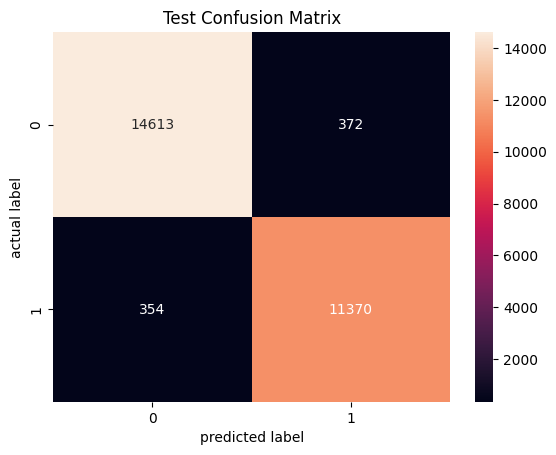

In [ ]:
y_pred_softmax = model.predict(padded_test)
y_pred = [1 if pred[0] >= 0.5 else 0 for pred in y_pred_softmax]

seq_acc = 100 * accuracy_score(y_test, y_pred)
print("Accuracy:", seq_acc)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.title("Test Confusion Matrix")
plt.show()


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Tipo de modelo", "Acuracia"]
x.add_rows(
    [
        ["BOW Regressao Linear", bow_lr_acc],
        ["BOW Naive Bayes", bow_nb_acc],
        ["BOW Random Forest", bow_rf_acc],
        ["BOW Xgb", bow_xgb_acc],
        ["TFIDF Regressao Linear", tf_lr_acc],
        ["TFIDF Naive Bayes", tf_nb_acc],
        ["TFIDF Random Forest", tf_rf_acc],
        ["TFIDF Xgb", tf_xgb_acc],
        ["Sequencial", seq_acc],
    ]
)

print(x)

+------------------------+-------------------+
|     Tipo de modelo     |      Acuracia     |
+------------------------+-------------------+
|  BOW Regressao Linear  |  91.3287655846344 |
|    BOW Naive Bayes     | 86.95570781384552 |
|   BOW Random Forest    | 99.91014264854543 |
|        BOW Xgb         | 92.80766782732412 |
| TFIDF Regressao Linear | 90.76715713804336 |
|   TFIDF Naive Bayes    | 87.09798195364858 |
|  TFIDF Random Forest   | 99.91763076116665 |
|       TFIDF Xgb        |  96.2671758583249 |
|       Sequencial       | 97.28181511849938 |
+------------------------+-------------------+


In [ ]:
embedding_matrix = np.zeros((len(t.word_index) + 1, 300)) # vector len of each word is 300

backend.clear_session()
input = Input(shape = (25, ), name = "input")

embedding = Embedding(input_dim = len(t.word_index) + 1,
                      output_dim = 300, # glove vector size
                      weights = [embedding_matrix],
                      trainable = False)(input)

lstm = LSTM(32)(embedding)
flatten = Flatten()(lstm)

dense = Dense(16, activation = None,
              kernel_initializer = "he_uniform")(flatten)

dropout = Dropout(.25)(dense)
activation = Activation("relu")(dropout)
output = Dense(2, activation = "softmax", name = "output")(activation)
model = Model(inputs = input, outputs = output)

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

plot_model(model, to_file = "./model.png", show_shapes = True)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 300)           8876400   
                                                                 
 lstm (LSTM)                 (None, 32)                42624     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 activation (Activation)     (None, 16)                0     

4º: Treinar o modelo

In [ ]:
# Treinar o modelo
from tensorflow.keras.callbacks import *

earlystop = EarlyStopping(monitor = "val_accuracy",
                          patience = 7,
                          verbose = 1,
                          restore_best_weights = True,
                          mode = 'max')

reduce_lr = ReduceLROnPlateau(monitor = "val_accuracy",
                              factor = .4642,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.001,
                              mode = 'max')

callbacks_list = [earlystop, reduce_lr]

history = model.fit(padded_train, y_train,
                    validation_data = (padded_test, y_test),
                    epochs = 30,
                    batch_size = 32,
                    callbacks = callbacks_list)

# nao funciona bem

# reference: https://www.kaggle.com/code/binginagesh/sarcastic-comments-99-97-accuracy


Epoch 1/30
895/895 [==============================] - 23s 22ms/step - loss: 0.6921 - accuracy: 0.5236 - val_loss: 0.6876 - val_accuracy: 0.5610 - lr: 0.0010
Epoch 2/30
266/895 [=======>......................] - ETA: 8s - loss: 0.6921 - accuracy: 0.5242

KeyboardInterrupt: ignored

5º: Testar acurácia

In [ ]:
# Tokenizacao e padding para o conjunto de teste
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_sequences_test = pad_sequences(sequences_test, maxlen=25, padding='post', truncating='post')

# Evaluar o modelo com o conjunto de teste
loss, accuracy = model.evaluate(padded_sequences_test, y_test)

print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss ')
plt.show()